In [1]:
from auto_drive_functions import retrieve_angle 
from PIL import Image
from ImageFrame import Frame
import timeit as ti
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [ ]:
img = Image.open('640x480newfortesting1C.jpg')

In [15]:
img = np.array(img)

In [16]:
img.shape

(360, 640, 3)

In [17]:
frame1 = Frame(640,360,10)

load CVS file successfully


In [18]:
data = frame1.get_data(img,5)

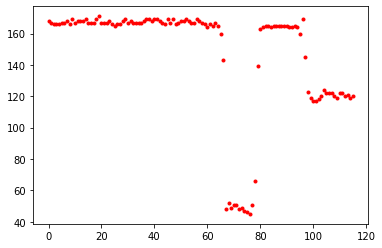

In [30]:
plt.plot(range(0,len(data['L2'])),data['L2'],'r.')

In [20]:
print(data['L1'].shape)

(56,)


In [21]:
print(frame1.lines_frame['L1'][0])

[637. 304.]


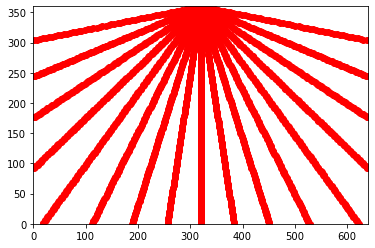

In [22]:
plt.axis([0.0,640,0.0,360])
for key in frame1.lines_frame.keys():
    plt.plot(frame1.lines_frame[key][:,0],frame1.lines_frame[key][:,1],'ro')
    

In [35]:
starttime = ti.default_timer()
angle = retrieve_angle(61,5,img,frame1)
print(ti.default_timer()-starttime)


nan
nan
65
103
71
124
edges:  {'L2': 65, 'L16': 103, 'L3': 71, 'L15': 124}

points: 
 [[501. 294.]
 [ 34. 256.]
 [476. 270.]
 [ 48. 203.]]
0.13476279999997587


In [36]:
print(angle[0])
points = angle[0]

[[501. 294.]
 [ 34. 256.]
 [476. 270.]
 [ 48. 203.]]


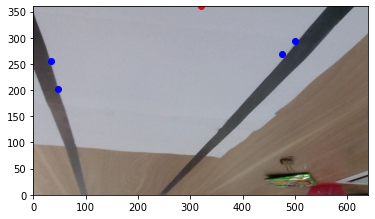

In [37]:
plt.axis([0.0,640,0.0,360])
imshow(img)
plt.plot(640/2,360,'ro')
plt.plot(points[:,0],points[:,1],'bo')
show()